In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files =[file for file in os.listdir(r"C:\Users\LENOVO\Desktop\Data analytics\Sales\Sales_Data")]    # r : it converts normal string to raw string
for file in files:
    print(file)

all_data.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
path = r"C:\Users\LENOVO\Desktop\Data analytics\Sales\Sales_Data"

#blank dataframe
Data = pd.DataFrame()

for file in files[1:]:
    current_df = pd.read_csv(path+"/"+file)
    Data = pd.concat([Data, current_df])
    
Data.shape

(186850, 6)

### Data Cleaning and Formatting

In [4]:
Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
Data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [5]:
Data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
#all_data = all_data.dropna(how='all')
Data.dropna(inplace = True)

In [7]:
Data.shape

(186305, 6)

In [8]:
def GetMonth(x):
    return x.split('/')[0]

In [9]:
Data['Month']=Data['Order Date'].apply(GetMonth)

In [10]:
Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [12]:
Data['Month'].dtype

dtype('O')

In [13]:
# Data['Month'].astype(int)             #giving error : invalid literal for int() with base 10: 'Order Date' because one weird entry

In [12]:
# to find what;s wrong
Data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [13]:
filter = Data['Month'] == 'Order Date'
Data = Data[~filter]                        #negation of filter

In [14]:
Data['Month']=Data['Month'].astype(int)

In [15]:
Data['Month'].dtype

dtype('int32')

In [16]:
Data['Price Each']=Data['Price Each'].astype(float)
Data['Quantity Ordered']=Data['Quantity Ordered'].astype(int)

### Total sales value for each product per order

In [17]:
Data['sales']=Data['Quantity Ordered']*Data['Price Each']
Data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Monthly sales analysis

In [18]:
monthwise_sales = np.round(Data.groupby('Month')['sales'].sum(),2)
monthwise_sales

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: sales, dtype: float64

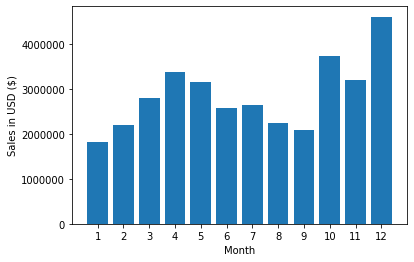

In [19]:
months=range(1,13)
plt.bar(months,monthwise_sales)
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show()

##### Store generated maximum sales in December followed by October

### Which city has maximum number of orders

In [34]:
'669 Spruce St, Los Angeles, CA 90001'.split(',')[1]

' Los Angeles'

In [35]:
def getcity(x):
    return x.split(',')[1]

In [36]:
Data['city']=Data['Purchase Address'].apply(getcity)
Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [37]:
Data.groupby('city').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,Hour
city,,,,,,,,,
Atlanta,14881,14881,14881,14881,14881,14881,14881,14881,14881
Austin,9905,9905,9905,9905,9905,9905,9905,9905,9905
Boston,19934,19934,19934,19934,19934,19934,19934,19934,19934
Dallas,14820,14820,14820,14820,14820,14820,14820,14820,14820
Los Angeles,29605,29605,29605,29605,29605,29605,29605,29605,29605
New York City,24876,24876,24876,24876,24876,24876,24876,24876,24876
Portland,12465,12465,12465,12465,12465,12465,12465,12465,12465
San Francisco,44732,44732,44732,44732,44732,44732,44732,44732,44732
Seattle,14732,14732,14732,14732,14732,14732,14732,14732,14732


In [38]:
citywise_sales = Data.groupby('city')['city'].count()
citywise_sales

city
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: city, dtype: int64

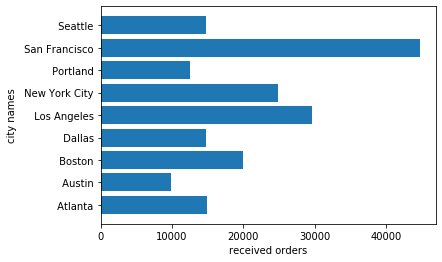

In [45]:
plt.barh(citywise_sales.index, citywise_sales)                                       #barh
plt.ylabel('city names')
plt.xlabel('received orders')
plt.show()

#### San Francisco got maximum orders

### Graph to show max. trafic time

In [52]:
Data['Hour'] = pd.to_datetime(Data['Order Date']).dt.hour
Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [62]:
hours=range(0,24)
orders = Data.groupby('Hour')['sales'].count()
orders

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: sales, dtype: int64

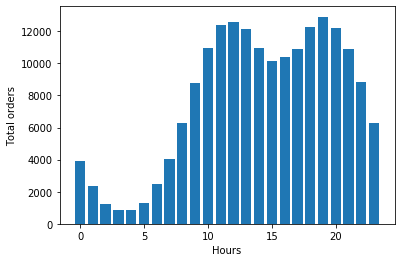

In [63]:
plt.bar(hours, orders)
plt.ylabel('Total orders')
plt.xlabel('Hours')
plt.show()

#### Stores get maximum traffic between 10 am - 2 pm   and   6pm - 9pm

### Better Way 

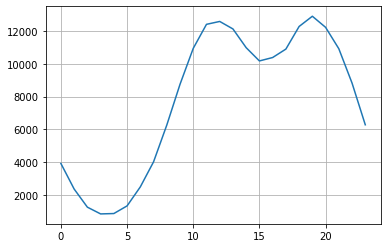

In [64]:
keys=[]
hour=[]
f = []
for key,hour_df in Data.groupby('Hour'):              #yh
    keys.append(key)
    hour.append(len(hour_df))
    f.append(hour_df)


plt.grid()
plt.plot(keys,hour)
plt.show()

### Now we can easily see the best time to advertise to maximise product purchase^ 

### What product sold the most? 

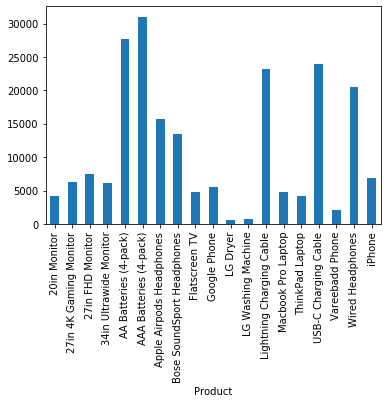

In [66]:
Data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

#### AAA battries(4 pack) is the maximum sold product

### Revenue Analysis

In [74]:
Data['sales'].sum()

34492035.97

##### Total revenue generated by stores is 34492036 USD

#### Product wise revenue

In [73]:
Data.groupby('Product')['sales'].sum()

Product
20in Monitor                   454148.71
27in 4K Gaming Monitor        2435097.56
27in FHD Monitor              1132424.50
34in Ultrawide Monitor        2355558.01
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Apple Airpods Headphones      2349150.00
Bose SoundSport Headphones    1345565.43
Flatscreen TV                 1445700.00
Google Phone                  3319200.00
LG Dryer                       387600.00
LG Washing Machine             399600.00
Lightning Charging Cable       347094.15
Macbook Pro Laptop            8037600.00
ThinkPad Laptop               4129958.70
USB-C Charging Cable           286501.25
Vareebadd Phone                827200.00
Wired Headphones               246478.43
iPhone                        4794300.00
Name: sales, dtype: float64

In [82]:
products=Data.groupby('Product')['Quantity Ordered'].sum().index
quantity=Data.groupby('Product')['Quantity Ordered'].sum()
revenue_by_product=Data.groupby('Product')['sales'].sum()

[Text(0, 0, '20in Monitor'),
 Text(0, 0, '27in 4K Gaming Monitor'),
 Text(0, 0, '27in FHD Monitor'),
 Text(0, 0, '34in Ultrawide Monitor'),
 Text(0, 0, 'AA Batteries (4-pack)'),
 Text(0, 0, 'AAA Batteries (4-pack)'),
 Text(0, 0, 'Apple Airpods Headphones'),
 Text(0, 0, 'Bose SoundSport Headphones'),
 Text(0, 0, 'Flatscreen TV'),
 Text(0, 0, 'Google Phone'),
 Text(0, 0, 'LG Dryer'),
 Text(0, 0, 'LG Washing Machine'),
 Text(0, 0, 'Lightning Charging Cable'),
 Text(0, 0, 'Macbook Pro Laptop'),
 Text(0, 0, 'ThinkPad Laptop'),
 Text(0, 0, 'USB-C Charging Cable'),
 Text(0, 0, 'Vareebadd Phone'),
 Text(0, 0, 'Wired Headphones'),
 Text(0, 0, 'iPhone')]

<Figure size 11520x2448 with 0 Axes>

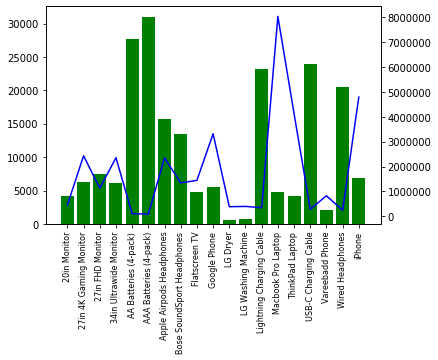

In [84]:
plt.figure(figsize=(60,34))
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, revenue_by_product, 'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)

#### Although Macbook Pro Laptop are sold in less quantity but they contribute max to the revenue, followed by iphone and thinkpad Laptop